# Лабораторная работа №4

### Задание 0: Описать задачу словами

Датасет содержит различные характеристики музыкальных треков. 
Необходимо решить задачу классификации - предсказать жанр трека по представленным признакам.

### Задание 1: Прочитать данные

Импортируем нужные библиотеки

In [253]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt
import seaborn as sns           
import sklearn             
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Импортируем наши данные

In [254]:
df = pd.read_csv("train.csv")

Посмотрим как они выглядят

In [255]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


И какую имеют размерность

In [256]:
df.shape

(17996, 17)

### Задание 2:  Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать. 

Давайте для начала построим гистограмму и посмотрим на распределение каждого признака

И убираем целевые зачения из датасета

In [257]:
targets = df['Class']
df = df.drop(columns=['Class'])

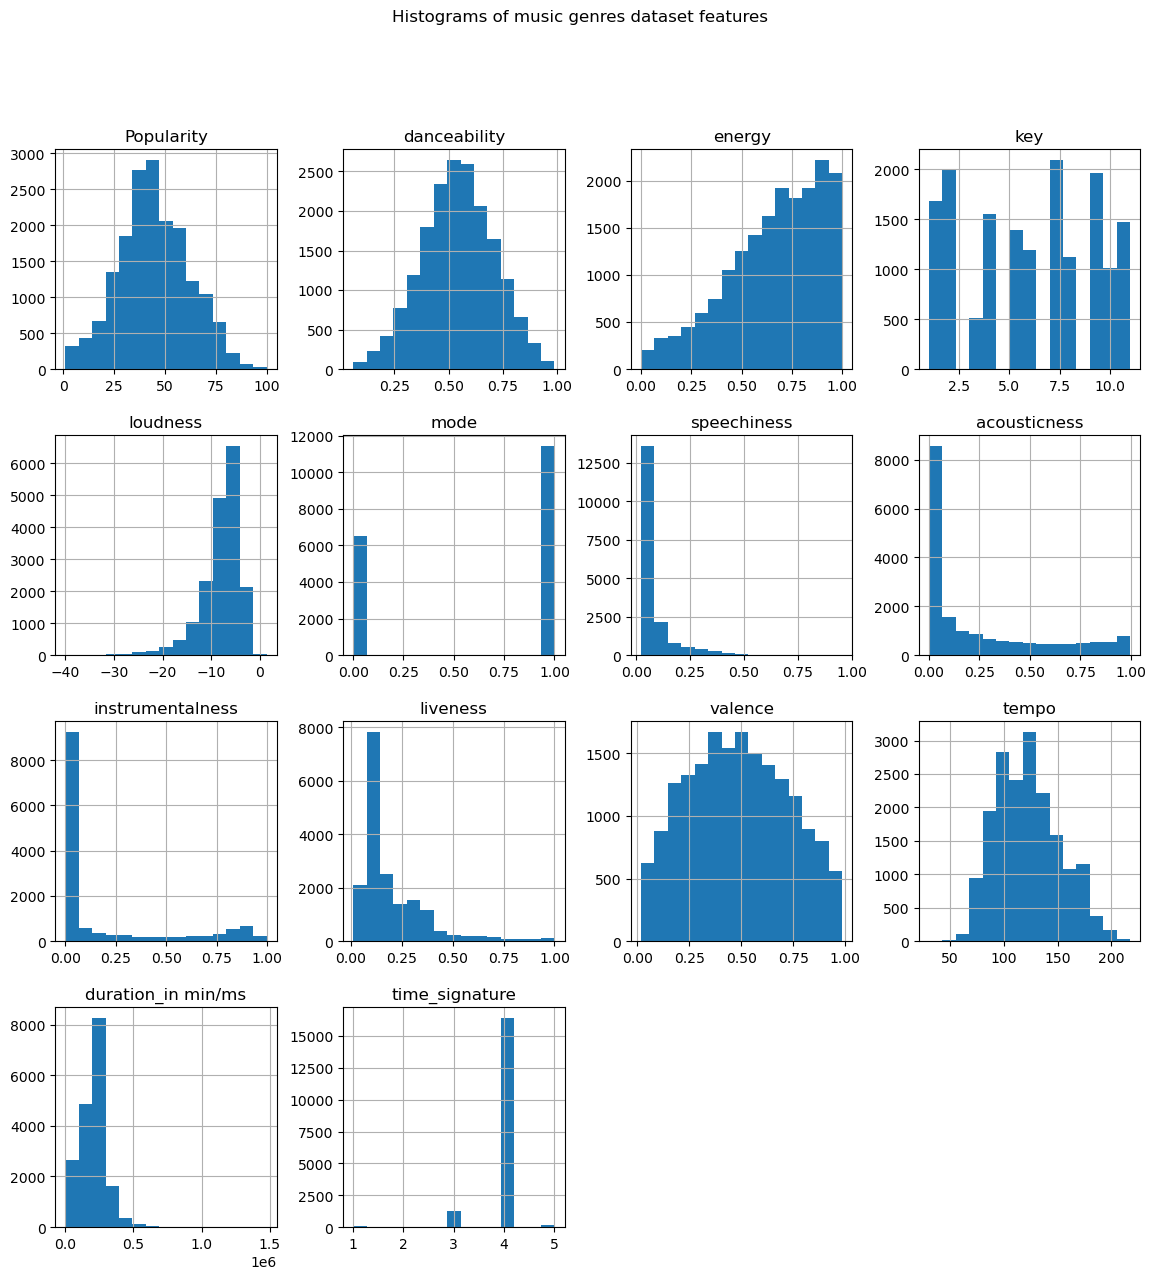

In [258]:
df.hist(figsize=(14, 14), bins=15)
plt.suptitle("Histograms of music genres dataset features")
plt.show()

Мы видим, что признаки Popularity, Danceability, Valence, Tempo имеют в принципе нормальое распределение

Признаки Loudness, Speechiness, Acousticness и Instrumentalness показывают выраженную асимметрию, что может повлиять на результаты моделей, чувствительных к распределению данных.

Теперь посмотрим на основные характеристики числовых признаков

In [259]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


Средние значения некоторых признаков (например, Popularity) отличаются от медиан, что опять же указывает на возможную асимметрию

Кроме того, существует большой разброс между min и max значениями признаков, что может говорить о выбросах

Построим корреляционную матрицу

Но перед этим посмотрим повнимательнее на признаки Track Name и Artist Name

Сделаем их категориальными и посмотрим сколько уникальных значений они содержат

In [260]:
df['Artist Name'] = df['Artist Name'].astype('category')
df['Track Name'] = df['Track Name'].astype('category')
df.describe(include=['category'])

,Artist Name,Track Name
count,17996,17996
unique,9149,15129
top,Backstreet Boys,Dreams
freq,69,9


Мы видим, что у классов Artist Name и Track Name высокий показатель уникальных элементов, что предположительно мало как повлияет на результаты предсказаний - поэтому решено удалить два этих столбца

In [261]:
df = df.drop(columns=['Artist Name', 'Track Name'])

<Axes: >

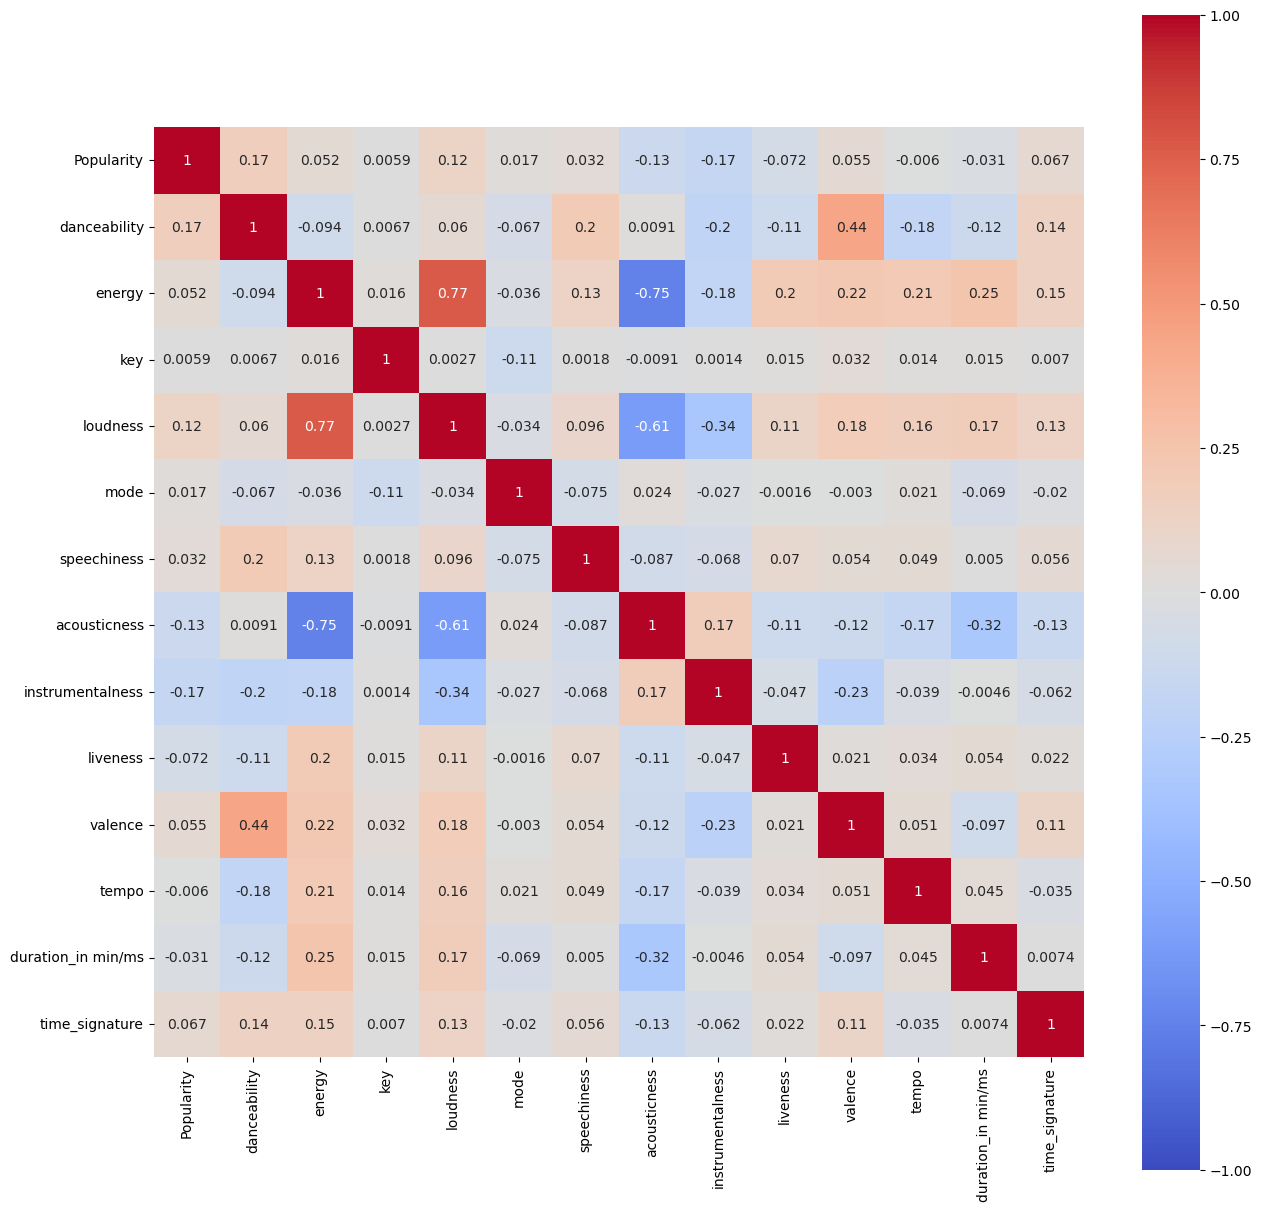

In [262]:
fig, ax = plt.subplots(figsize = (15, 15))

sns.heatmap(df.corr(), square = True, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

Заметим, что у Loudness и Energy высокая степерь корелляции, что на самом деле выглядит достаточно естественно.
Также мы видим, что у Acousticness и Energy, и Acousticness и Loudness, наоборот, низкая корелляция, что тоже в принципе адекватно нашему музыкальному опыту.
Все остальные зависимости выгядят нормальными

### Задача 3: Обработать пропущенные значения (или убедиться, что их нет)

Вернем целевые значения

In [263]:
df['Class'] = targets

Теперь проверим количество пропущенных значения для каждого признака

In [264]:
df.isnull().sum()

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

В данном случае кажется наиболее подходящим заполнить пропуски в Popularity и key средним значением по каждому столбцу, а Для instrumentalness, где пропусков больше, рассмотрим вариант заполнения медианой, так как это может быть более устойчиво к выбросам.

In [265]:
df['Popularity'].fillna(df['Popularity'].mean(), inplace=True)

df['key'].fillna(df['key'].mean(), inplace=True)

df['instrumentalness'].fillna(df['instrumentalness'].median(), inplace=True)
     

df.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

### Задача 4:  Обработать категориальные признаки

Давайте пристальнее посмотрим на наши признаки

Можно заметить, что в датасете есть 3 категориальных признака (кроме целевого значения) - это mode, key, time_signature.
Так как mode представляет группу двух типов тональностей (мажор и минор), key - ключевая нота, определяющая тоальность произведения, time_signature - музыкальный размер

Давайте изменим тип этих признаков на category

In [266]:
category_list=[
    'mode',
    'key',
    'time_signature'
]

df[category_list].dtypes

mode                int64
key               float64
time_signature      int64
dtype: object

In [267]:
df[category_list] = df[category_list].astype('category')
df[category_list].dtypes

mode              category
key               category
time_signature    category
dtype: object

In [268]:
df[category_list].head(10)

,mode,key,time_signature
0,1,1.0,4
1,1,3.0,4
2,1,6.0,4
3,0,10.0,4
4,1,2.0,4
5,1,6.0,4
6,0,5.0,4
7,1,5.0,4
8,1,10.0,4
9,0,1.0,4


Как мы видим, категориальные признаки представлены числами, поэтому нам не надо проводить дополнительную обработку

### Задача 5: Провести нормализацию (или объяснить, почему в вашем случае она не нужна)

Давайте посмотрим еще раз на разброс значений у признаков

In [269]:
df.describe().round(2)

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,Class
count,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00
mean,44.51,0.54,0.66,-7.91,0.08,0.25,0.14,0.20,0.49,122.62,200744.46,6.70
std,17.22,0.17,0.24,4.05,0.08,0.31,0.27,0.16,0.24,29.57,111989.13,3.21
min,1.00,0.06,0.00,-39.95,0.02,0.00,0.00,0.01,0.02,30.56,0.50,0.00
25%,33.00,0.43,0.51,-9.54,0.03,0.00,0.00,0.10,0.30,99.62,166337.00,5.00
50%,44.00,0.55,0.70,-7.02,0.05,0.08,0.00,0.13,0.48,120.07,209160.00,8.00
75%,56.00,0.66,0.86,-5.19,0.08,0.43,0.06,0.26,0.67,141.97,252490.00,10.00
max,100.00,0.99,1.00,1.36,0.96,1.00,1.00,1.00,0.99,217.42,1477187.00,10.00


Как мы видим разброс значений у разных признаков довольно высокий, что может повлиять на обучение, поэтому давайте проведем нормализацию

In [270]:
targets = df['Class']
features = df.drop(columns=['Class'])

In [271]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [272]:
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['Class'] = targets
df_scaled.describe().round(2)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00,17996.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,6.70
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.21
min,-2.53,-2.91,-2.82,-1.64,-7.91,-1.32,-0.68,-0.80,-0.49,-1.16,-1.95,-3.11,-1.79,-8.09,0.00
25%,-0.67,-0.67,-0.65,-0.65,-0.40,-1.32,-0.54,-0.78,-0.49,-0.62,-0.79,-0.78,-0.31,0.21,5.00
50%,-0.03,0.01,0.16,-0.00,0.22,0.76,-0.39,-0.53,-0.48,-0.42,-0.02,-0.09,0.08,0.21,8.00
75%,0.67,0.70,0.84,0.68,0.67,0.76,0.04,0.60,-0.29,0.39,0.77,0.65,0.46,0.21,10.00
max,3.22,2.68,1.43,1.68,2.29,0.76,10.47,2.41,3.13,5.05,2.08,3.21,11.40,2.98,10.00


### Задание 6: Разбить данные на обучающую и тестовую выборки

Давайте теперь разделим наши данные на тестовую и обучающую выборки

In [273]:
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [274]:
X_train.shape

(14396, 14)

In [275]:
y_train.size

14396

### Задание 7: Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)

Давайте начнем наше обучение с K ближайших соседей, так как это хороший исходный выбор для многоклассовой классификации

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Выполним предсказания для обучающей и тестовой выборки

In [278]:
y_train_predict = knn_model.predict(X_train)
y_test_predict  = knn_model.predict(X_test)

Давайте посмотрим на точность

In [279]:
train_accuracy = knn_model.score(X_train, y_train)
test_accuracy = knn_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.5648096693525979
Test Accuracy: 0.46055555555555555


In [280]:
from sklearn.metrics import accuracy_score
 
model_test_accuracy = accuracy_score(y_test, y_test_predict)
round(model_test_accuracy, 2)

0.46

In [281]:
model_train_accuracy = accuracy_score(y_train, y_train_predict)
round(model_train_accuracy, 2)

0.56

Как видим, результат пока не очень:(

### Задание 8: Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра)

Для того, чтобы найти более оптималнное кол-во соседей, можно провести поиск по гиперпараметрам с помощью cross-validation

In [282]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best k:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best k: {'n_neighbors': 20}
Best Cross-Validation Score: 0.4840924221373162


### Задание 9: Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 

Давайте теперь изменим модель исходя из полученных данных об оптимальном кол-ве соседей

In [283]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [284]:
train_accuracy = knn_model.score(X_train, y_train)
test_accuracy = knn_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.5371631008613503
Test Accuracy: 0.48638888888888887


На тестовых данныъх точность стала немного получше, но она все равно очень низкая

Посмотрим поподробнее на различные метрики классификатора

In [285]:
from sklearn.metrics import classification_report

y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.73      0.68       136
           1       0.23      0.03      0.06       286
           2       0.49      0.35      0.41       281
           3       0.77      0.55      0.64        78
           4       0.48      0.62      0.54        71
           5       0.64      0.64      0.64       262
           6       0.33      0.22      0.26       500
           7       0.81      0.94      0.87       103
           8       0.55      0.50      0.53       382
           9       0.47      0.47      0.47       531
          10       0.44      0.66      0.53       970

    accuracy                           0.49      3600
   macro avg       0.53      0.52      0.51      3600
weighted avg       0.47      0.49      0.46      3600



Как мы видим, такие классы как 1, 2, 6 определяются плохо, что может быть связано с несбалансированностью данных

### Задание 10: Запустить другие классификаторы и выбать параметры. Выбрать релевантные! Сравнить результаты

Давайте теперь попрорбуем использовать Random Forest, так как он устойчив к шуму и хорошо работает на несбалансированных данных

In [286]:
from sklearn.ensemble import RandomForestClassifier

Преиущество данной модели в параметре class_weight='balanced', который учитывает несбалансированность данных

In [287]:
rf_model = RandomForestClassifier(class_weight='balanced')

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [288]:
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Test Accuracy:", rf_accuracy)

Random Forest Test Accuracy: 0.5033333333333333


Давайте найдем оптимальные гиперпараметры и для этой модели

In [290]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


Оценим лучшую модель на тестовой сборке

In [291]:
y_pred_best = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       136
           1       0.06      0.03      0.04       286
           2       0.52      0.49      0.51       281
           3       0.84      0.78      0.81        78
           4       0.63      0.75      0.68        71
           5       0.69      0.71      0.70       262
           6       0.33      0.29      0.31       500
           7       0.93      0.92      0.93       103
           8       0.61      0.59      0.60       382
           9       0.53      0.53      0.53       531
          10       0.46      0.53      0.49       970

    accuracy                           0.51      3600
   macro avg       0.57      0.59      0.58      3600
weighted avg       0.49      0.51      0.50      3600



Как мы видим результат не сильно изменился, хотя 2 и 6 классы стали лучше определяться

### Задача 11: как-то побороться с несбалансированностью классов (если она есть)

Предлагаю все-таки побороться с несбалансированностью классов

Попробуем Undersampling подход, который заключается в уменьшении количества примеров в наиболее многочисленных классах

In [292]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [293]:
print("Class distribution after undersampling:", pd.Series(y_train_under).value_counts())

Class distribution after undersampling: Class
0     316
1     316
2     316
3     316
4     316
5     316
6     316
7     316
8     316
9     316
10    316
Name: count, dtype: int64


Попробуем снова создать модель K ближайших соседей и протестиуем ее на новых данных

In [295]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train_under, y_train_under)

best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [297]:
rf_accuracy = best_rf_model.score(X_test, y_test)
print("Random Forest Test Accuracy:", rf_accuracy)

Random Forest Test Accuracy: 0.45305555555555554


Мы видим, что точность модели ухудшилась, так как возможно была потеряна важная информации, особенно если меньший класс был представлен небольшим количеством образцов.

Давайте попробуем метод SMOTE (Synthetic Minority Over-sampling Technique), который создает синтетические примеры меньшего класса. Это поможет сохранить информацию и повысить качество модели.

In [298]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [299]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [300]:
rf_accuracy = best_rf_model.score(X_test, y_test)
print("Random Forest Test Accuracy:", rf_accuracy)

Random Forest Test Accuracy: 0.48527777777777775


Как мы видим точность улучшилась, но все равно ниже первоначальной

Давайте попробуем использовать SVM

In [314]:

from sklearn.svm import SVC

In [318]:
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_model.fit(X_train, y_train)

SVC()

In [321]:
svc_accuracy = svc_model.score(X_test, y_test)
print("SVM Test Accuracy:", svc_accuracy)

SVM Test Accuracy: 0.5266666666666666


Метод опорных векторов показывает самый лучший результат

### Задание 12: исключить коррелированные переменные (объяснить зачем)

Давайте удалим высоко коррелирующие признаки, как мы помним, это Loudness и Energy

In [327]:

df_reduced = df_scaled.drop(columns=['loudness'])
df_reduced = df_scaled.drop(columns=['energy'])
df_reduced

,Popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0.899519,1.867915,-1.643929,0.727743,0.755294,-0.373407,-0.740387,-0.478253,-0.698900,1.718614,0.387130,0.302284,0.210065,5
1,0.551045,-0.970946,-0.980043,0.168104,0.755294,-0.467934,-0.791896,-0.477889,-0.597774,0.344694,-0.208629,0.455312,0.210065,10
2,-0.552454,-0.658190,0.015785,-0.104553,0.755294,-0.325545,0.769157,-0.491769,1.242595,1.252314,0.847383,-0.813293,0.210065,6
3,1.247992,1.861901,1.343556,0.341479,-1.323988,-0.289648,-0.727188,-0.478253,-0.465870,0.344694,-0.527221,-0.239105,0.210065,5
4,0.492966,-2.264071,-1.311986,0.896919,0.755294,1.630811,-0.794893,-0.433891,-0.151814,-1.642078,2.584879,0.260886,0.210065,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,-0.552454,-2.270086,0.347728,-2.269512,-1.323988,-0.459558,2.401358,2.506239,-0.614105,-1.287357,1.655818,-0.065137,-2.555361,6
17992,-1.017085,0.568775,1.675499,-0.558982,-1.323988,-0.560068,1.966748,-0.492424,-0.789348,-0.629541,-1.677582,0.502943,0.210065,2
17993,-0.610533,0.087612,-0.648100,0.797142,-1.323988,-0.101790,-0.795342,-0.491987,2.951060,-0.933469,-0.595971,0.138210,0.210065,8
17994,-0.900927,-1.975373,0.015785,-1.196911,-1.323988,0.649642,-0.791285,2.841048,0.375800,-0.546273,0.295553,0.169205,0.210065,8


In [328]:
X = df_reduced.drop(columns=['Class'])
y = df_reduced['Class']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
knn_accuracy = knn_model.score(X_test, y_test)
print("KNN Test Accuracy:", knn_accuracy)

SVM Test Accuracy: 0.4597222222222222


In [331]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Test Accuracy:", rf_accuracy)

Random Forest Test Accuracy: 0.49722222222222223


In [333]:
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_model.fit(X_train, y_train)
svc_accuracy = svc_model.score(X_test, y_test)
print("SVM Test Accuracy:", svc_accuracy)

SVM Test Accuracy: 0.52


Как мы видим, результаты не сильно изменились, скорее всего из-за того, что у нас остаются несбалансированные классы

### Задание 13: Сделать общие выводы

Как мы увидели из трех провереых моделей самой лучшей оказалась SVM, точность которой составила 0.52

Проблемы с которыми мы столкнулись при обработке данных - это прежде всего высокая корреляция двух класса Loudness и Energy, а также несбалансированность классов.